In [1]:
import numpy as np
import matplotlib.pyplot as plt
from poke.writing import read_serial_to_rayfront
from poke.poke_core import Rayfront
import poke.plotting as plot
import time
import poppy

In [22]:
# Use pre-generated rayfronts
ntrials = 10
nrays = 10
nrays_list = np.arange(10,110,nrays)
npix = 512
times = np.empty([ntrials,nrays])
rms = np.copy(times)

x = np.linspace(-2e-4,2e-4,npix)
x,y = np.meshgrid(x,x)
dcoords = np.array([x.ravel(),y.ravel(),np.zeros_like(x.ravel())])
timelist = []
rmslist = []

# load a rayfront
rf = read_serial_to_rayfront('sample_rayfront_gbd10rays.msgpack')

-0.002803122961513402

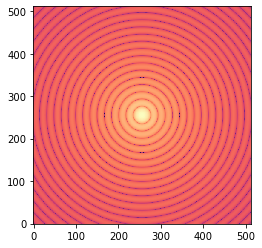

In [24]:
pix_meters = x[0,0]-x[0,1]
efl_hst = 57.6
pix_as = pix_meters/efl_hst*206265
airy_ref = poppy.misc.airy_2d(diameter=2.4,wavelength=rf.wavelength,shape=(512,512),pixelscale=pix_as)
airy_ref /= np.sum(airy_ref)
plt.imshow(np.log10(airy_ref))
pix_as

In [27]:
pix_LD = pix_meters/efl_hst * 2.4/551e-9
pix_LD*512

-30.3072276818644

In [25]:
np.save('airy_epd_2400mm_wlen_551nm_pixscale_2.8mas_npix_512.npy',airy_ref)

In [15]:
for i in range(ntrials):
    for j,nrays in enumerate(nrays_list):
        rf = read_serial_to_rayfront(f'sample_rayfront_gbd{nrays}rays.msgpack')
        t1 = time.perf_counter()
        field = rf.beamlet_decomposition_field(dcoords,dnorms=np.array([0,1,0]),misaligned=True,memory_avail=8)
        times[i,j] = (time.perf_counter()-t1)
        irrad = np.abs(field)**2
        irrad /= np.sum(irrad)
        rms[i,j] = (np.std(airy_ref-irrad.reshape([npix,npix])))

pixels =  65536
rays =  60
beamlet field at wavelength = 5.51e-07
computeunit =  60
override nloops =  1
(3, 65536)
(3,)
centroid at =  [-2.11058023e-17 -1.69822200e-17  0.00000000e+00]
centroid offset applied
phi shape =  (65536, 60)
loop 2 completed, time elapsed = 0.2549711670144461
pixels =  65536
rays =  276
beamlet field at wavelength = 5.51e-07
computeunit =  276
override nloops =  1
(3, 65536)
(3,)
centroid at =  [8.42755063e-17 8.40895027e-17 0.00000000e+00]
centroid offset applied
phi shape =  (65536, 276)
loop 2 completed, time elapsed = 1.4708575000113342
pixels =  65536
rays =  648
beamlet field at wavelength = 5.51e-07
computeunit =  648
override nloops =  1
(3, 65536)
(3,)
centroid at =  [1.32368035e-17 1.25416090e-17 0.00000000e+00]
centroid offset applied
phi shape =  (65536, 648)
loop 2 completed, time elapsed = 3.2762830419960665
pixels =  65536
rays =  1184
beamlet field at wavelength = 5.51e-07
computeunit =  592
override nloops =  2
(3, 65536)
(3,)
centroid at =  

In [18]:
np.save('runtimes_new_cpu_10.npy',times)
np.save('rms_new_cpu_10.npy',rms)

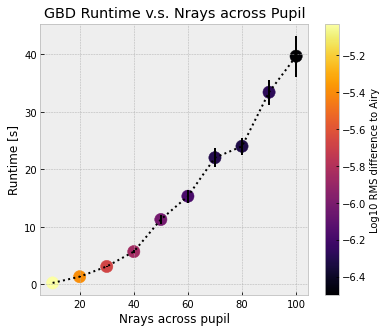

In [17]:
plt.style.use('bmh')
plt.figure(figsize=[6,5])
plt.title('GBD Runtime v.s. Nrays across Pupil')
plt.errorbar(nrays_list,np.array(np.mean(times,axis=0)),np.array(np.std(times,axis=0)),linestyle='dotted',color='black')
plt.scatter(nrays_list,np.array(np.mean(times,axis=0)),c=np.log10(np.mean(rms,axis=0)),cmap='inferno',s=150)
plt.colorbar(label='Log10 RMS difference to Airy')
plt.ylabel('Runtime [s]',fontsize=12)
plt.xlabel('Nrays across pupil',fontsize=12)
plt.show()

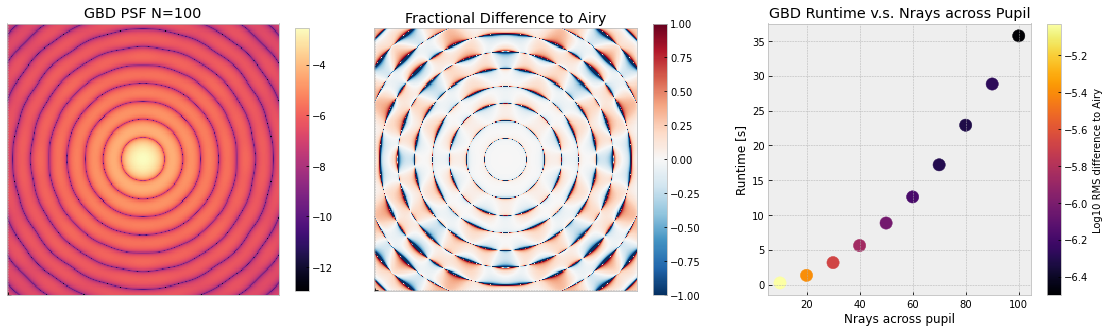

In [5]:
plt.style.use('bmh')
plt.figure(figsize=[20,5])
plt.subplot(131)
plt.title('GBD PSF N=100')
plt.imshow(np.log10(irrad.reshape([256,256])))
plt.xticks([0],[''])
plt.yticks([0],[''])
plt.colorbar(fraction=0.04)
plt.subplot(132)
plt.title('Fractional Difference to Airy')
plt.imshow((airy_ref-irrad.reshape([256,256]))/airy_ref,cmap='RdBu_r',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks([0],[''])
plt.yticks([0],[''])
plt.subplot(133)
plt.title('GBD Runtime v.s. Nrays across Pupil')
plt.scatter(nrays_list,timelist,c=np.log10(rmslist),cmap='inferno',s=150)
plt.colorbar(label='Log10 RMS difference to Airy')
plt.ylabel('Runtime [s]',fontsize=12)
plt.xlabel('Nrays across pupil',fontsize=12)
plt.show()

In [6]:
np.save('runtimes_gbd_weber.npy',timelist)

In [21]:
field = rf.beamlet_decomposition_field(dcoords,dnorms=np.array([0,1,0]))

pixels =  65536
rays =  7668
beamlet field at wavelength = 5.51e-07
computeunit =  451
override nloops =  18
(3, 65536)
(3,)
centroid at =  [-7.52091379e-18 -7.79478690e-18  0.00000000e+00]
centroid offset applied
phi shape =  (65536, 451)
loop 0 completed, time elapsed = 3.869765083999937
phi shape =  (65536, 451)
loop 1 completed, time elapsed = 7.794634249999945
phi shape =  (65536, 451)
loop 2 completed, time elapsed = 11.634672166999962
phi shape =  (65536, 451)
loop 3 completed, time elapsed = 15.108829541999967
phi shape =  (65536, 451)
loop 4 completed, time elapsed = 19.003410583999994
phi shape =  (65536, 451)
loop 5 completed, time elapsed = 22.602738584000008
phi shape =  (65536, 451)
loop 6 completed, time elapsed = 26.396467167000083
phi shape =  (65536, 451)
loop 7 completed, time elapsed = 29.887257625000075
phi shape =  (65536, 451)
loop 8 completed, time elapsed = 33.430172000000084
phi shape =  (65536, 451)
loop 9 completed, time elapsed = 36.70811954200008
phi shape

ValueError: cannot reshape array of size 65536 into shape (64,64)

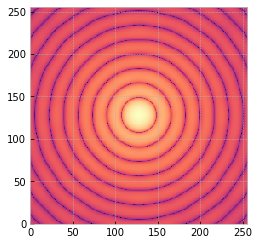

In [22]:
plt.imshow(np.log10(np.abs(field.reshape([256,256]))))

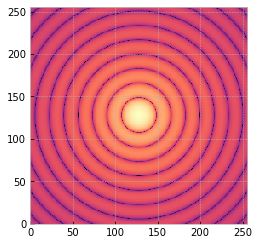